In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from pylab import rcParams

%matplotlib inline
params = {'axes.labelsize': 14,'axes.titlesize':14, 'text.fontsize': 14, 'legend.fontsize': 14,
          'xtick.labelsize': 13, 'ytick.labelsize': 14}
rcParams['figure.figsize'] = 6.5, 4

matplotlib.rcParams.update(params)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
data = pd.read_csv('Data Mining VU data/training_set_VU_DM_2014.csv')

In [4]:
df = data.head(500)
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


#  Feature Engineering

1. Extract season: autumn, summer, winter 


In [5]:
df['date_time']= pd.to_datetime(df['date_time'])
#data.date_time.map(lambda x: x.month)

df['season'] = df.date_time.apply(lambda dt: (dt.month%12 + 3)//3)
df

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,season
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0,2
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0,2
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2


In [6]:
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,season
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0,2
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0,2
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2


In [7]:
# Drop columns with all zeros - only temporary
df = df.dropna(how="all", axis = 1)
df = df.loc[:, (df != 0).any(axis=0)]
df

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,season
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
5,1,2013-04-04 08:32:15,12,187,219,30184,4,4.5,1,2.77,...,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0,2
6,1,2013-04-04 08:32:15,12,187,219,44147,3,3.5,1,2.20,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
7,1,2013-04-04 08:32:15,12,187,219,50984,2,0.0,0,1.61,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2
8,1,2013-04-04 08:32:15,12,187,219,53341,4,4.0,1,2.56,...,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0,2
9,1,2013-04-04 08:32:15,12,187,219,56880,4,4.0,1,2.83,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2


In [17]:
# Subselect columns - include booking_book
summary_metrics = pd.DataFrame(df.describe())
summary_metrics.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff', 'click_bool', 'gross_b

In [20]:
list(summary_metrics.columns)

['srch_id',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'prop_starrating',
 'prop_review_score',
 'prop_brand_bool',
 'prop_location_score1',
 'prop_location_score2',
 'prop_log_historical_price',
 'position',
 'price_usd',
 'promotion_flag',
 'srch_destination_id',
 'srch_length_of_stay',
 'srch_booking_window',
 'srch_adults_count',
 'srch_children_count',
 'srch_room_count',
 'srch_saturday_night_bool',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'random_bool',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',
 'comp8_inv',
 'comp8_rate_percent_diff',
 'click_bool',
 'gross_bookings_usd',
 'booking_bool',
 'season']

In [22]:
df=df[list(summary_metrics.columns)]

In [24]:
df

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,season
0,1,12,187,219,893,3,3.5,1,2.83,0.0438,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
1,1,12,187,219,10404,4,4.0,1,2.20,0.0149,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
2,1,12,187,219,21315,3,4.5,1,2.20,0.0245,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
3,1,12,187,219,27348,2,4.0,1,2.83,0.0125,...,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2
4,1,12,187,219,29604,4,3.5,1,2.64,0.1241,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
5,1,12,187,219,30184,4,4.5,1,2.77,0.1302,...,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0,2
6,1,12,187,219,44147,3,3.5,1,2.20,0.0356,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2
7,1,12,187,219,50984,2,0.0,0,1.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2
8,1,12,187,219,53341,4,4.0,1,2.56,0.1238,...,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0,2
9,1,12,187,219,56880,4,4.0,1,2.83,0.1028,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2


In [8]:
df.iloc[:,45:50]

,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,season
0,NaN,0,NaN,0,2
1,NaN,0,NaN,0,2
2,NaN,0,NaN,0,2
3,5.0,0,NaN,0,2
4,NaN,0,NaN,0,2
5,7.0,0,NaN,0,2
6,NaN,0,NaN,0,2
7,NaN,0,NaN,0,2
8,6.0,0,NaN,0,2
9,NaN,0,NaN,0,2


### Calculate correlation and mutual information/information gain

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: 

ZeroDivisionError: 0.0 cannot be raised to a negative power

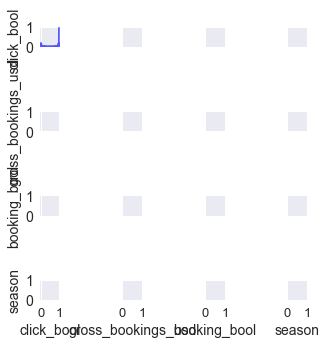

In [23]:
g = sns.pairplot( df.iloc[:,45:50], hue="booking_bool",palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10),  )
g.set(xticklabels=[])


In [13]:
x=10
0**x

0

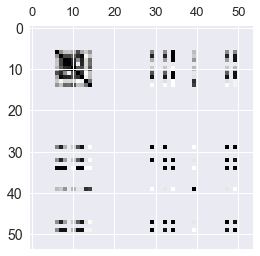

In [23]:
plt.matshow(df.corr())

